In [1]:
#importing al the libraries used 
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import warnings
from tkinter import *
from tkinter import simpledialog as sml

# Input Breast Cancer Data Set and we selected the last 10 parameters because they provided the highest accuracy

In [2]:
#uploading the last 10 features of the dataset
df=pd.read_csv('BreastCancer.csv',index_col=False)
data=df[["diagnosis","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
         "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]]
#printing frst 20 data points
data.head(20)


,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,M,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,M,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,M,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,M,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


# We have to turn the diagnosis column into string values for operations so we changed Malignant(M) to 1 and Benign(B) to 0

In [3]:
#used to lift warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
#cleaning the data Malegnin Cancer is 1 and Benign is 0
    data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')


# plotting the diagnosis with radius

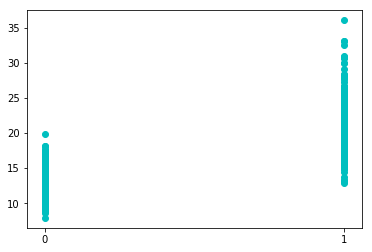

In [8]:
#plot bewteen diagnosis and radius
a=data['diagnosis']
b=data['radius_worst']
plt.scatter(a,b,c='c')
plt.show()

# input diagnosis  into a variable 

In [30]:
#input the diagnosis column into y
y=data['diagnosis'].values
y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0',
       '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0',
       '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1',
       '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1

# plotting radius against  other features to depict data

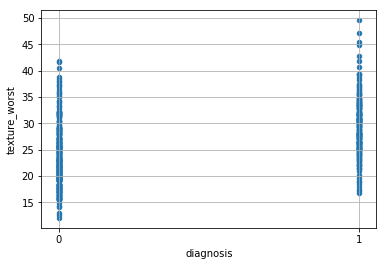

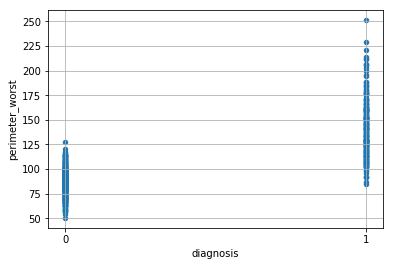

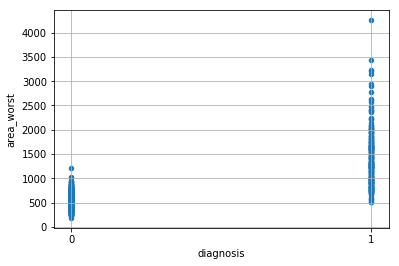

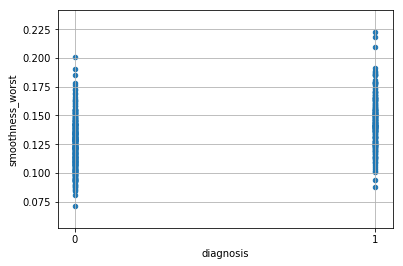

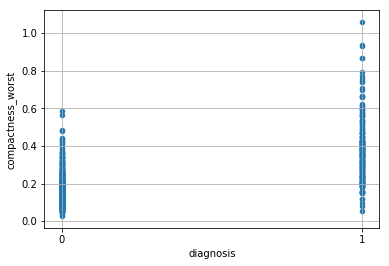

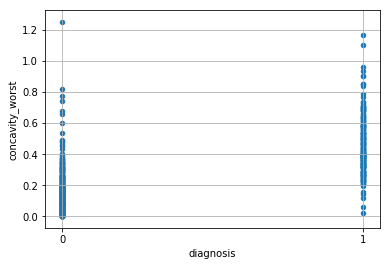

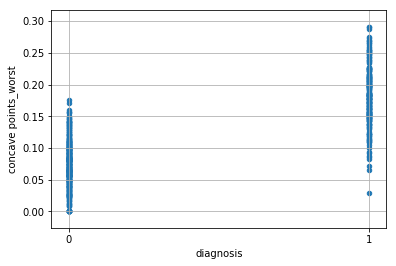

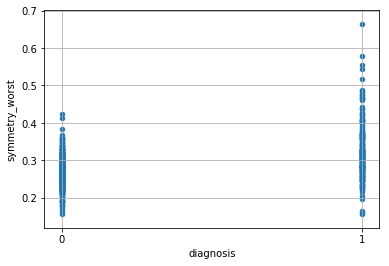

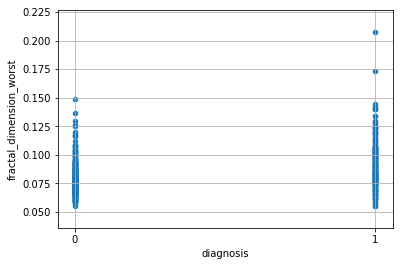

In [7]:
#plots between radius and the other parameters
data.plot(kind = 'scatter' , x = 'diagnosis', y= 'texture_worst'  )
plt.grid()
data.plot(kind = 'scatter' , x  = 'diagnosis' , y= 'perimeter_worst')
plt.grid()
data.plot(kind = 'scatter' , x = 'diagnosis', y = 'area_worst' )
plt.grid()
data.plot(kind = 'scatter' , x = 'diagnosis' , y= 'smoothness_worst')
plt.grid()
data.plot(kind = 'scatter' , x = 'diagnosis', y = 'compactness_worst' )
plt.grid()
data.plot(kind = 'scatter' , x ='diagnosis' , y = 'concavity_worst' )
plt.grid()
data.plot(kind = 'scatter' , x = 'diagnosis' , y = 'concave points_worst')
plt.grid()
data.plot(kind = 'scatter' , x =  'diagnosis', y ='symmetry_worst' )
plt.grid()
data.plot(kind = 'scatter' , x = 'diagnosis' , y = 'fractal_dimension_worst')
plt.grid()
plt.show()

In [7]:
#print the number of data points with diagnosis 0 and with 1
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [8]:
#shape of the data set
print(data.shape)

(569, 11)


In [9]:
#to print the mean,std,min and max values of the data
data.describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Fitting Data into training and testing

In [33]:
#splitting the data into training and testing
y=data['diagnosis'].values
x=data.drop('diagnosis',axis=1).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

# Checking Efficiency of different models

In [35]:
#checking the training data with three models the model with maximum efficiency is used
mlist=[]
mlist.append(('Logistic Regression',LogisticRegression()))
mlist.append(('SVM',SVC()))
mlist.append(('KNN',KNeighborsClassifier()))
mlist

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform'))]

In [12]:
k=10
results=[]
names=[]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name,model in mlist:
        kfold=KFold(n_splits=k,random_state=112)
        start=time.time()
        cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
        end=time.time()
        results.append(cv_results)
        names.append(name)
        print('%s:%f(%f)(run time:%f)'%(name,cv_results.mean(),cv_results.std(),end-start))

Logistic Regression:0.947101(0.031698)(run time:0.047871)
SVM:0.654589(0.070438)(run time:0.210410)
KNN:0.914541(0.047119)(run time:0.029916)


# The data which has the maximum efficiency in the code is used as the model

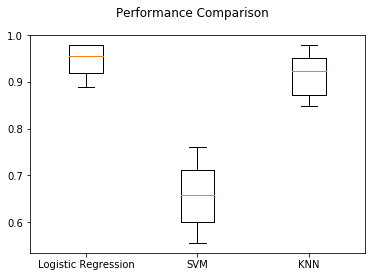

In [13]:
#plotting the graph of efficiency of threee models
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:

M=LogisticRegression()#calling the model
with warnings.catch_warnings():#lift warnings
    warnings.simplefilter("ignore")
    M.fit(x_train,y_train)#fitting the data
    prediction=M.predict(x_test)#predictingn the diagnosis
    print(prediction)


['0' '1' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1'
 '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '1'
 '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1'
 '1' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '1'
 '0' '1' '0' '0' '1' '0']


In [15]:
print(accuracy_score(y_test,prediction))#accuracy of the model

0.956140350877193


[[65  1]
 [ 4 44]]


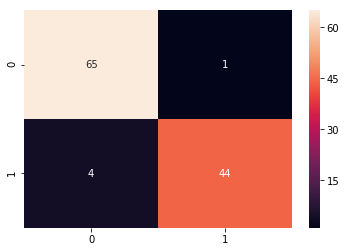

In [16]:
cf=confusion_matrix(y_test,prediction)#print and plot the confusion matrix
print(cf)
sns.heatmap(cf,annot=True,fmt='d')

In [17]:
print(classification_report(y_test,prediction))#print the classification report

             precision    recall  f1-score   support

          0       0.94      0.98      0.96        66
          1       0.98      0.92      0.95        48

avg / total       0.96      0.96      0.96       114



# Entering survival data in which the person will survive if survival_status is 1 otherwise not

In [39]:
#input and load the survival dataset
hbr=pd.read_csv("survival.csv",delimiter=",")
print(hbr.head())
print(hbr.shape)
hbr["Survival_Status"].value_counts()

   Age  Operation_Age  Axillary_nodes  Survival_Status
0   30             64               1                1
1   30             62               3                1
2   30             65               0                1
3   31             59               2                1
4   31             65               4                1
(306, 4)


1    225
2     81
Name: Survival_Status, dtype: int64

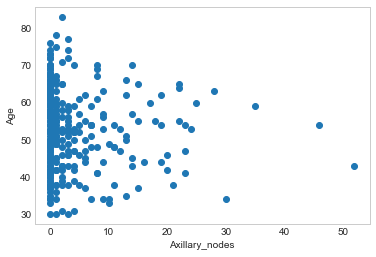

In [41]:
#plot between axillary nodes and age
plt.scatter(hbr.Axillary_nodes,hbr.Age)
plt.xlabel('Axillary_nodes')
plt.ylabel('Age')
plt.grid()
plt.show()

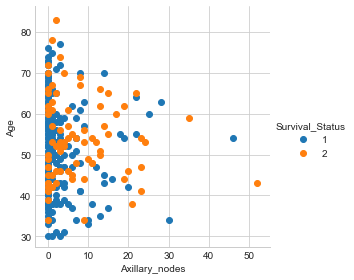

In [43]:
sns.set_style('whitegrid')
sns.FacetGrid(hbr, hue="Survival_Status", size=4).map(plt.scatter, "Axillary_nodes", "Age") \
.add_legend();
plt.show();#plot between axilary nodes and age with survival status.
# \backward slash represents the contineuty of the statement.

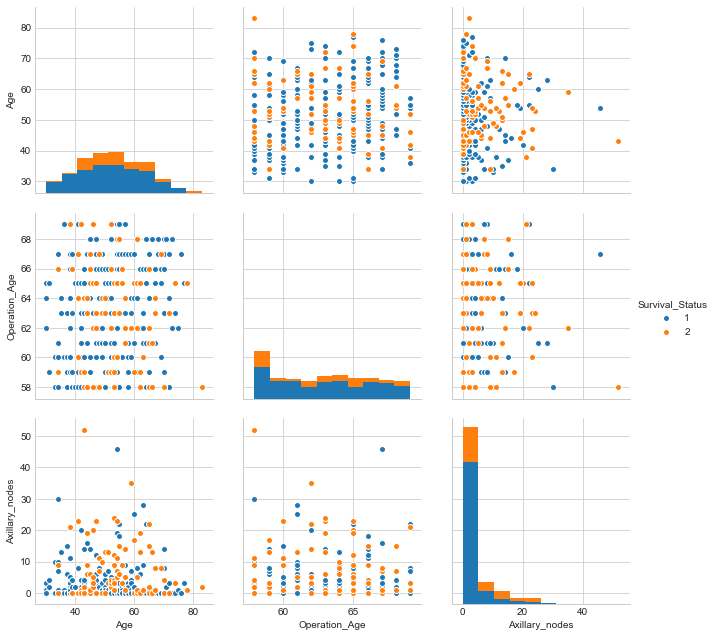

In [46]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hbr, hue="Survival_Status", size=3, vars=['Age','Operation_Age', 'Axillary_nodes'])
plt.show()

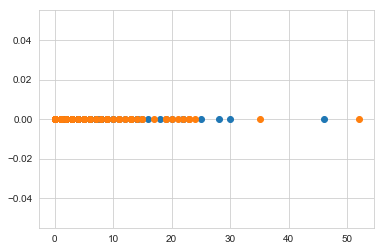

In [33]:
import numpy as np
haberman_Long_Survive = hbr.loc[hbr["Survival_Status"] == 1];
haberman_Short_Survive = hbr.loc[hbr["Survival_Status"] == 2];
plt.plot(haberman_Long_Survive["Axillary_nodes"], np.zeros_like(haberman_Long_Survive["Axillary_nodes"]), 'o')
plt.plot(haberman_Short_Survive["Axillary_nodes"], np.zeros_like(haberman_Short_Survive['Axillary_nodes']), 'o')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


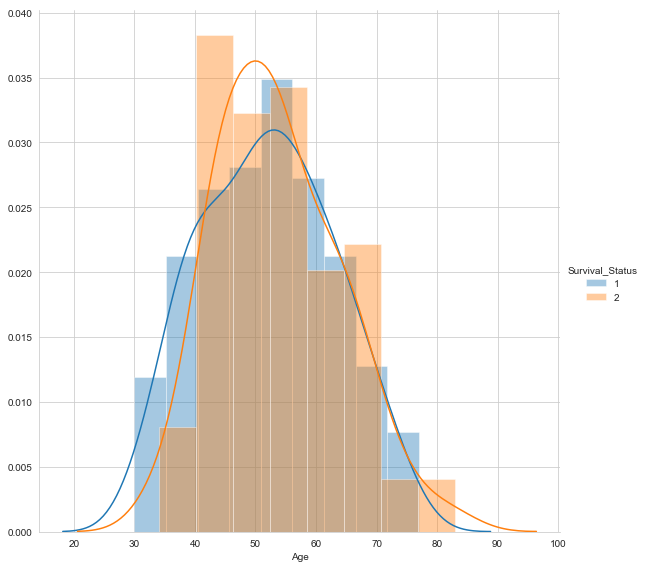

In [34]:
sns.FacetGrid(hbr,hue="Survival_Status", size=8)\
.map(sns.distplot,"Age")\
.add_legend()

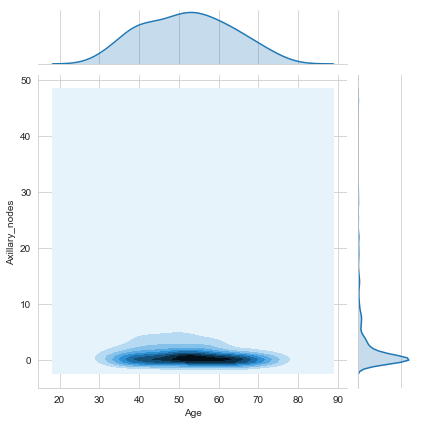

In [35]:
sns.jointplot(x="Age",y="Axillary_nodes",data=haberman_Long_Survive,kind="kde")
plt.grid()
plt.show()


In [58]:
#splitting the data into training and testing data
y1=np.array(hbr['Survival_Status'])
x1=np.array(hbr.drop('Survival_Status',axis=1))
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=20)


In [48]:
#calling the model
SVM=SVC()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    SVM.fit(x1,y1)
    pred=SVM.predict(x1_test)
    print(pred)

[1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


[[44  0]
 [ 6 12]]


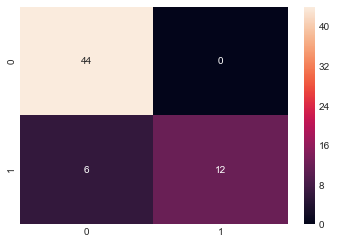

In [49]:
#printing the confusion matrix and the heatmap
cf=confusion_matrix(y1_test,pred)
print(cf)
sns.heatmap(cf,annot=True,fmt='d')

In [50]:
#accuracy of the model
print(accuracy_score(y1_test,pred))

0.9032258064516129


In [51]:
#printing the classification report
print(classification_report(y1_test,pred))

             precision    recall  f1-score   support

          1       0.88      1.00      0.94        44
          2       1.00      0.67      0.80        18

avg / total       0.91      0.90      0.90        62



# Making input windows using tkinter library and entering the attributes asked in the dialog box to get the output for malignant or beingn cancer of if the patient will survive or not


In [59]:

input=[]
ab=[]
def quit1():#function to destroy window
    global root1
    root1.destroy()

def get():#function for survival prediction
    #command to input diffrent attributes
    a=sml.askfloat("Input","Enter Age")
    ab.append(a)
    b=sml.askfloat("Input","Enter Operation year")
    ab.append(b)
    c=sml.askfloat("Input","Enter Axillary nodes:")
    ab.append(c)
    w=SVM.predict([ab])
    if w==[1]:
        print("Patient may survive for 5 year or more")
        quit1()#command to quit input window
        root2=Tk()
        f=Label(root2,text="Patient may survive for 5 year or more")
        f.pack()
#         root4.geometry("50x50")
        root2.mainloop()
    
    
    else:
        print("Patient may survive less than 5 years")
        quit1()
        root2=Tk()
        f=Label(root2,text="Patient may survive less than 5 years")
        f.pack()
#         root4.geometry("50x50")
        root2.mainloop()

    

        
def getx():#function for cancer diagnosis
    a=sml.askfloat("Input","Radius(7,36)")
    input.append(a)
    b=sml.askfloat("Input","Texture(12,50)")
    input.append(b)
    c=sml.askfloat("Input","Perimeter(50,250)")
    input.append(c)
    d=sml.askfloat("Input","Area(150,4500)")
    input.append(d)
    e=sml.askfloat("Input","Smoothness(0.05,0.25)")
    input.append(e)
    f=sml.askfloat("Input","Compactness(0.025,1.1)")
    input.append(f)
    g=sml.askfloat("Input","Concavity(0,1.5)")
    input.append(g)
    h=sml.askfloat("Input","Concave points(0,0.3)")
    input.append(h)
    i=sml.askfloat("Input","Symmetry(0.15,0.7)")
    input.append(i)
    j=sml.askfloat("Input","Fractal_dimension(0.05,0.2)")
    input.append(j)

    p=M.predict([input])
    
    if p==['0']:
        print("Cancer is Benign")
        quit1()
        root2=Tk()
        f=Label(root2,text="Cancer is Benign")
        f.pack()
        root2.geometry("50x50")
        root2.mainloop()
        
    else:
        print("Cancer is Malignant")
        quit1()
        root2=Tk()
        f=Label(root2,text="Cancer is Malignant")
        f.pack()
        root2.geometry("50x50")
        root2.mainloop()
        
    
root1=Tk()
#to display labels and text on the input window
a=Label(root1,text="Breast Cancer prediction",bg="SkyBlue4",fg="lavender",font=10,width=100)
a.pack()
b=Label(root1,text="To predict Malignant or Benign Cancer on the Basis of the following features:\n\n Radius\nTexture\nPerimeter\nArea\nSmoothness\nCompactness\nConcavity\nConcave points\nSymmetry\nFractal dimension",height=12,bg="lavender")
b.pack()
#button to enter the atrributes
button1=Button(root1,text="Enter attributes ",bg="cyan4",fg="white",command=getx,font=3,width=20)
button1.pack()


#spacing between the text
zz=Label(root1,height=1)
zz.pack()
c=Label(root1,text="Survival prediction",bg="SkyBlue4",fg="lavender",font=10,width=100)
c.pack()
d=Label(root1,bg="lavender",text="To predict the survival of patient on the Basis of the following features:\n\n Age\nOperation Age\nAxillary nodes",height=6)
d.pack()
button2=Button(root1,text="Enter Atrributes ",bg="cyan4",fg="white",command=get,font=3,width=20)
button2.pack()
#the size of the complete window
root1.geometry("500x500")

root1.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ANKUSH\Anaconda3\lib\tkinter\__init__.py", line 1699, in __call__
    return self.func(*args)
  File "<ipython-input-59-8efe7fa922cf>", line 16, in get
    w=SVM.predict([ab])
  File "C:\Users\ANKUSH\Anaconda3\lib\site-packages\sklearn\svm\base.py", line 548, in predict
    y = super(BaseSVC, self).predict(X)
  File "C:\Users\ANKUSH\Anaconda3\lib\site-packages\sklearn\svm\base.py", line 308, in predict
    X = self._validate_for_predict(X)
  File "C:\Users\ANKUSH\Anaconda3\lib\site-packages\sklearn\svm\base.py", line 439, in _validate_for_predict
    X = check_array(X, accept_sparse='csr', dtype=np.float64, order="C")
  File "C:\Users\ANKUSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 453, in check_array
    _assert_all_finite(array)
  File "C:\Users\ANKUSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 44, in _assert_all_finite
    " or a value too large for %r." % X.dt